### GCP bigquery example


In [1]:
# imports
import numpy as np
import pandas as pd
import category_encoders as ce
from sklearn.preprocessing import LabelEncoder

# tools for getting data
from google.cloud import bigquery

from ipywidgets import interact, interact_manual
import ipywidgets as widgets
import wordcloud
import matplotlib.pyplot as plt


In [2]:
# get hackernews data using bigquery
# https://www.kaggle.com/sohier/beyond-queries-exploring-the-bigquery-api
# if you need to setup google api credentials, see this ref: https://cloud.google.com/docs/authentication/getting-started
# you may also need to use google cloud console to enable 'bigquery' for your query user/api key
# https://cloud.google.com/bigquery/docs/access-control
# hackernews feed updated daily:  https://medium.com/@hoffa/hacker-news-on-bigquery-now-with-daily-updates-so-what-are-the-top-domains-963d3c68b2e2
client = bigquery.Client()
hn_dataset_ref = client.dataset('hacker_news', project='bigquery-public-data')


In [3]:
# check that connection works
type(hn_dataset_ref)

google.cloud.bigquery.dataset.DatasetReference

In [4]:
hn_dset = client.get_dataset(hn_dataset_ref)
[x.table_id for x in client.list_tables(hn_dset)]

['comments', 'full', 'full_201510', 'stories']

In [5]:
def f(x):
    return x
# Generate a slider 
interact(f, x=10,);

10

In [6]:
hn_full = client.get_table(hn_dset.table('full'))
type(hn_full)

google.cloud.bigquery.table.Table

In [7]:
[command for command in dir(hn_full) if not command.startswith('_')]

['clustering_fields',
 'created',
 'dataset_id',
 'description',
 'encryption_configuration',
 'etag',
 'expires',
 'external_data_configuration',
 'friendly_name',
 'from_api_repr',
 'from_string',
 'full_table_id',
 'labels',
 'location',
 'modified',
 'num_bytes',
 'num_rows',
 'partition_expiration',
 'partitioning_type',
 'path',
 'project',
 'reference',
 'schema',
 'self_link',
 'streaming_buffer',
 'table_id',
 'table_type',
 'time_partitioning',
 'to_api_repr',
 'to_bqstorage',
 'view_query',
 'view_use_legacy_sql']

In [8]:
hn_full.schema

[SchemaField('by', 'STRING', 'NULLABLE', "The username of the item's author.", ()),
 SchemaField('score', 'INTEGER', 'NULLABLE', 'Story score', ()),
 SchemaField('time', 'INTEGER', 'NULLABLE', 'Unix time', ()),
 SchemaField('timestamp', 'TIMESTAMP', 'NULLABLE', 'Timestamp for the unix time', ()),
 SchemaField('title', 'STRING', 'NULLABLE', 'Story title', ()),
 SchemaField('type', 'STRING', 'NULLABLE', 'Type of details (comment, comment_ranking, poll, story, job, pollopt)', ()),
 SchemaField('url', 'STRING', 'NULLABLE', 'Story url', ()),
 SchemaField('text', 'STRING', 'NULLABLE', 'Story or comment text', ()),
 SchemaField('parent', 'INTEGER', 'NULLABLE', 'Parent comment ID', ()),
 SchemaField('deleted', 'BOOLEAN', 'NULLABLE', 'Is deleted?', ()),
 SchemaField('dead', 'BOOLEAN', 'NULLABLE', 'Is dead?', ()),
 SchemaField('descendants', 'INTEGER', 'NULLABLE', 'Number of story or poll descendants', ()),
 SchemaField('id', 'INTEGER', 'NULLABLE', "The item's unique id.", ()),
 SchemaField('ran

In [9]:
BYTES_PER_GB = 2**30
hn_full.num_bytes / BYTES_PER_GB

7.0778540931642056

In [10]:
def estimate_gigabytes_scanned(query, bq_client):
    # see https://cloud.google.com/bigquery/docs/reference/rest/v2/jobs#configuration.dryRun
    my_job_config = bigquery.job.QueryJobConfig()
    my_job_config.dry_run = True
    my_job = bq_client.query(query, job_config=my_job_config)
    BYTES_PER_GB = 2**30
    return my_job.total_bytes_processed / BYTES_PER_GB

In [14]:
headlines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1855 entries, 0 to 1854
Data columns (total 6 columns):
id         1855 non-null int64
author     1855 non-null object
title      1855 non-null object
time_ts    1855 non-null datetime64[ns, UTC]
score      1855 non-null int64
url        1855 non-null object
dtypes: datetime64[ns, UTC](1), int64(2), object(3)
memory usage: 87.0+ KB


In [16]:
headlines.to_csv("hackernews_ML_articles.csv" ,  sep=',', header=True)

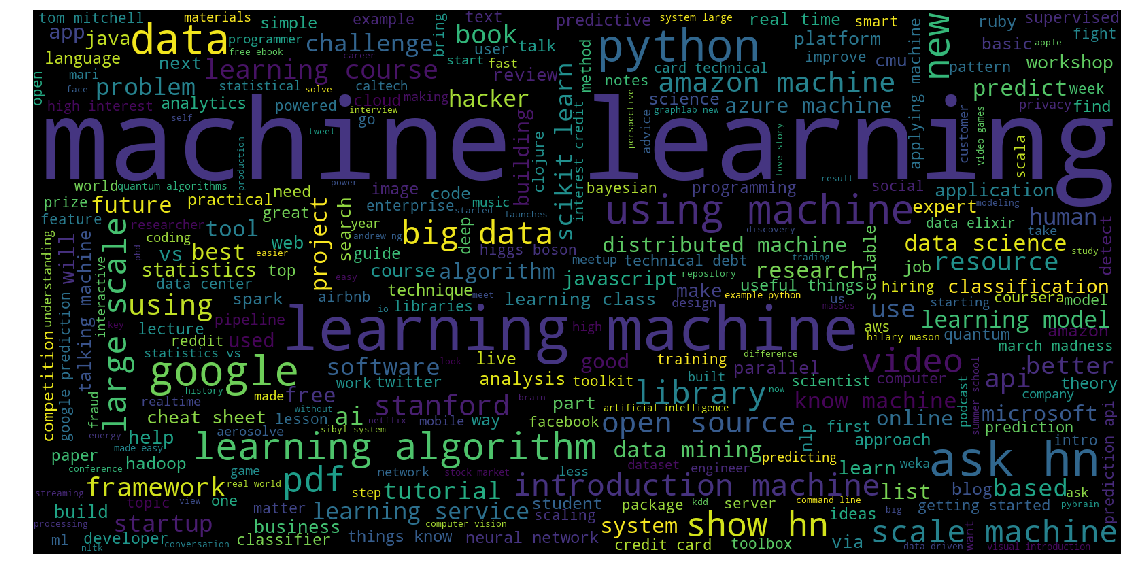

In [17]:
words = ' '.join(headlines.title).lower()
cloud = wordcloud.WordCloud(background_color='black',
                            max_font_size=200,
                            width=1600,
                            height=800,
                            max_words=300,
                            relative_scaling=.5).generate(words)
plt.figure(figsize=(20,10))
plt.axis('off')
plt.savefig('kaggle-hackernews.png')
plt.imshow(cloud);